In [97]:
# Import useful libraries
import gdeltxp
import gdeltviz
import operator
import scipy as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import statsmodels.regression as reg
import matplotlib.pyplot as plt
from math import isnan
from datetime import datetime
from collections import Counter, OrderedDict
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

In [2]:
twitter_data = pd.read_csv('C:/Users/Administrator/Desktop/Eirene/twitter_data.csv')
#twitter_data = pd.read_csv('C:/Users/henry/Dropbox/TWITTER/twitter_data.csv').sort_values('Timestamp', ascending=1)

In [3]:
ArrTime = [0]
times = sorted(list(twitter_data.Timestamp))
for i in range(len(list(twitter_data.Timestamp))-1):
    d1 = datetime.strptime(times[i], '%Y-%m-%d %H:%M:%S') 
    d2 = datetime.strptime(times[i+1], '%Y-%m-%d %H:%M:%S') 
    delta = (d2 - d1).seconds
    if delta < 300:
        ArrTime.append(delta)
    else:
        ArrTime.append(0)        
twitter_data['ArrTime'] = ArrTime

In [4]:
twitter_data.head(10)

,Timestamp,UserID,RT,Fav,TweetLen,PosWords,NegWords,ArrTime
0,2017-04-02 19:04:28,848612112494735362,439.0,233.0,27,0,0,0
1,2017-04-02 19:04:29,848612115128758273,0.0,0.0,18,0,0,1
2,2017-04-02 19:04:34,848612134816817152,119.0,137.0,29,0,0,1
3,2017-04-02 19:04:34,848612135479455745,554.0,460.0,22,0,0,2
4,2017-04-02 19:04:36,848612143448686594,168.0,157.0,26,0,0,1
5,2017-04-02 19:04:37,848612150235025408,1707.0,1957.0,31,0,0,0
6,2017-04-02 19:04:38,848612154085429250,6.0,3.0,30,0,0,0
7,2017-04-02 19:04:45,848612184041168896,87.0,40.0,28,0,0,2
8,2017-04-02 19:04:47,848612190148055043,66.0,35.0,18,0,0,0
9,2017-04-02 19:04:52,848612210863742977,2.0,1.0,16,0,0,1


In [5]:
print('Tweets: ', len(twitter_data))
print('RT: ', len(twitter_data[twitter_data.RT > 0]))
print('Fav: ', len(twitter_data[twitter_data.Fav > 0]))
print('Users: ', len(set(twitter_data.UserID)))

Tweets:  10107404
RT:  7642650
Fav:  6850465
Users:  10103102


In [6]:
Counter(twitter_data.UserID).most_common(10)

[(822518188609011714, 6),
 (822518393181904896, 6),
 (778668618129235968, 4),
 (778668612181688323, 4),
 (822518285711343617, 4),
 (778668612504653824, 4),
 (778668449245519873, 4),
 (822518784061804544, 4),
 (797562877456580608, 3),
 (778668630661881856, 3)]

In [7]:
for index, row in twitter_data.iterrows():
    twitter_data.set_value(index, 'Timestamp', int(row.Timestamp[:10].replace('-','')))

In [8]:
twitter_data.head(10)

,Timestamp,UserID,RT,Fav,TweetLen,PosWords,NegWords,ArrTime
0,20170402,848612112494735362,439.0,233.0,27,0,0,0
1,20170402,848612115128758273,0.0,0.0,18,0,0,1
2,20170402,848612134816817152,119.0,137.0,29,0,0,1
3,20170402,848612135479455745,554.0,460.0,22,0,0,2
4,20170402,848612143448686594,168.0,157.0,26,0,0,1
5,20170402,848612150235025408,1707.0,1957.0,31,0,0,0
6,20170402,848612154085429250,6.0,3.0,30,0,0,0
7,20170402,848612184041168896,87.0,40.0,28,0,0,2
8,20170402,848612190148055043,66.0,35.0,18,0,0,0
9,20170402,848612210863742977,2.0,1.0,16,0,0,1


In [9]:
twitter_df = pd.concat([twitter_data.groupby('Timestamp')['ArrTime', 'TweetLen'].mean(), twitter_data.groupby('Timestamp')['RT', 'Fav', 'PosWords', 'NegWords'].sum()], axis=1)

In [10]:
tweet_counts = []
for date in list(twitter_df.index):
    tweet_counts.append(len(twitter_data[twitter_data.Timestamp == date]))
twitter_df['Tweets'] = tweet_counts

In [11]:
twitter_df.head(10)

,ArrTime,TweetLen,RT,Fav,PosWords,NegWords,Tweets
Timestamp,,,,,,,
20160911,1.048383,24.457235,287660.0,164738.0,258,45,4361
20160912,1.930897,24.494482,4532694.0,3086731.0,2942,739,36062
20160913,1.619007,25.076207,4915644.0,3052886.0,4295,1334,48867
20160914,0.845102,25.037506,2883815.0,2056129.0,2612,525,31808
20160915,1.741547,24.959742,1670461.0,1061135.0,1612,448,20170
20160916,1.074823,24.219481,2159568.0,1390254.0,2409,687,40295
20160917,1.977888,23.876874,2534144.0,1698023.0,3128,1094,46627
20160918,2.240310,24.307525,2232602.0,1534565.0,2876,604,41821
20160919,2.600000,24.358969,3513855.0,2132814.0,3880,807,53740


In [12]:
#fav = scaler.fit_transform(list(twitter_df.Fav))
#rt = scaler.fit_transform(list(twitter_df.RT))
#tweets = scaler.fit_transform(list(twitter_df.Tweets))
#PI = []
#for i in range(len(tweets)):
#    PI.append((fav[i]*rt[i]*tweets[i])**(1./3.))
#twitter_df['PI'] = PI

In [13]:
#twitter_df.head(10)

In [14]:
#del twitter_df['Fav']
#del twitter_df['RT']
#del twitter_df['Tweets']
#twitter_df.head(10)

# Inter-arrival Time

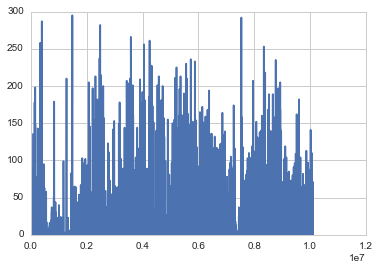

In [15]:
plt.plot(ArrTime)

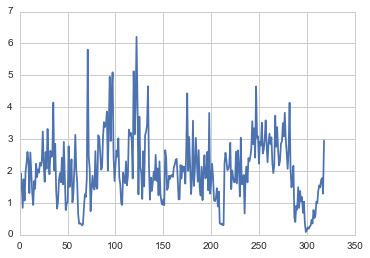

In [16]:
plt.plot(list(twitter_df.ArrTime))

In [114]:
twitter_df[twitter_df.ArrTime <= .25]

,ArrTime,TweetLen,RT,Fav,PosWords,NegWords,Tweets,Dates
Timestamp,,,,,,,,
20170813,0.085333,24.714476,8237391.0,6256399.0,1385,378,34547,20170813
20170814,0.142470,24.827059,9694860.0,6279409.0,3844,484,48768,20170814
20170815,0.236865,24.027125,8976568.0,6112525.0,3176,1373,63741,20170815
20170816,0.188661,24.081985,12941491.0,10394974.0,4478,1566,69903,20170816


In [115]:
twitter_df[twitter_df.ArrTime == twitter_df.ArrTime.min()]

,ArrTime,TweetLen,RT,Fav,PosWords,NegWords,Tweets,Dates
Timestamp,,,,,,,,
20170813,0.085333,24.714476,8237391.0,6256399.0,1385,378,34547,20170813


In [116]:
twitter_df.ArrTime.mean() - twitter_df.ArrTime.std()

1.0336113224412309

# Tweet Length

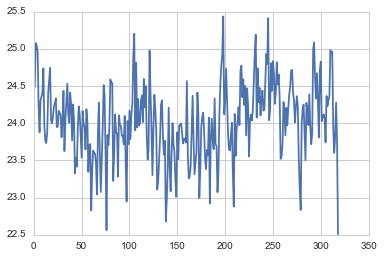

In [117]:
plt.plot(list(twitter_df.TweetLen))

In [118]:
pd.concat([twitter_df[twitter_df['TweetLen'] >= 25], twitter_df[twitter_df['TweetLen'] <=22.8]])

,ArrTime,TweetLen,RT,Fav,PosWords,NegWords,Tweets,Dates
Timestamp,,,,,,,,
20160913,1.619007,25.076207,4915644.0,3052886.0,4295,1334,48867,20160913
20160914,0.845102,25.037506,2883815.0,2056129.0,2612,525,31808,20160914
20170104,1.582464,25.201869,16278093.0,17012411.0,1300,3646,43340,20170104
20170412,3.822371,25.435347,1276962.0,786348.0,375,105,8940,20170412
20170524,1.587007,25.190255,72014.0,40183.0,30,2,431,20170524
20170616,3.338293,25.412840,7470447.0,7733936.0,1473,171,27352,20170616
20170807,1.375479,25.082580,7990118.0,5703150.0,3918,637,36050,20170807
20161201,1.853071,22.563364,3001958.0,2231720.0,2272,717,44552,20161201
20170208,1.373436,22.678227,2238142.0,1167901.0,1053,477,26615,20170208


In [119]:
twitter_df.TweetLen.mean()

24.03014807692297

# Positive Words

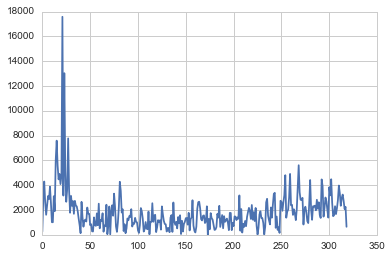

In [120]:
plt.plot(list(twitter_df.PosWords))
#plt.yscale('log')

In [121]:
twitter_df[twitter_df.PosWords >= 6e3]

,ArrTime,TweetLen,RT,Fav,PosWords,NegWords,Tweets,Dates
Timestamp,,,,,,,,
20160926,0.933233,23.873653,5985811.0,5013764.0,6026,2391,124673,20160926
20160927,1.685801,24.402781,9200130.0,8175263.0,7593,6838,94771,20160927
20161003,2.255713,24.223281,62567286.0,48757933.0,17581,14317,284381,20161003
20161005,2.320443,24.332754,15339818.0,11324840.0,13033,2482,132404,20161005
20161009,2.596731,24.141167,5915031.0,4769140.0,7776,1288,57577,20161009


In [122]:
twitter_df[twitter_df.PosWords == twitter_df.PosWords.max()]

,ArrTime,TweetLen,RT,Fav,PosWords,NegWords,Tweets,Dates
Timestamp,,,,,,,,
20161003,2.255713,24.223281,62567286.0,48757933.0,17581,14317,284381,20161003


# Negative Words

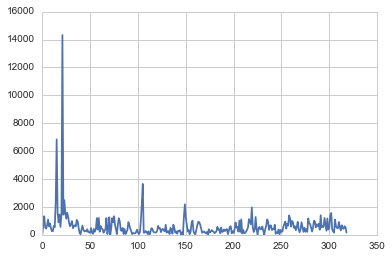

In [123]:
plt.plot(list(twitter_df.NegWords))
#plt.yscale('log')

In [127]:
twitter_df[twitter_df.NegWords >= 2e3]

,ArrTime,TweetLen,RT,Fav,PosWords,NegWords,Tweets,Dates
Timestamp,,,,,,,,
20160926,0.933233,23.873653,5985811.0,5013764.0,6026,2391,124673,20160926
20160927,1.685801,24.402781,9200130.0,8175263.0,7593,6838,94771,20160927
20161003,2.255713,24.223281,62567286.0,48757933.0,17581,14317,284381,20161003
20161005,2.320443,24.332754,15339818.0,11324840.0,13033,2482,132404,20161005
20170103,1.809688,24.905600,6333060.0,4055694.0,1891,2234,47606,20170103
20170104,1.582464,25.201869,16278093.0,17012411.0,1300,3646,43340,20170104
20170219,0.944512,23.010744,3086396.0,2146623.0,1044,2189,30529,20170219


In [128]:
twitter_df[twitter_df.NegWords == twitter_df.NegWords.max()]

,ArrTime,TweetLen,RT,Fav,PosWords,NegWords,Tweets,Dates
Timestamp,,,,,,,,
20161003,2.255713,24.223281,62567286.0,48757933.0,17581,14317,284381,20161003


# Perceived Importance

In [129]:
plt.plot(list(twitter_df.PI))

AttributeError: 'DataFrame' object has no attribute 'PI'

In [130]:
twitter_df[twitter_df.PI >= 10]

AttributeError: 'DataFrame' object has no attribute 'PI'

In [29]:
del twitter_data

# GDELT

In [131]:
events_data = gdelt = pd.read_csv('C:/Users/Administrator/Dropbox/GDELT/events_sep16_aug17.csv').sort_values('SQLDATE', ascending=1)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (10,11,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [132]:
events_data.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,688467575,20160911,201609,2016,2016.6877,COLREB,FARC,COL,NaN,NaN,...,1,Colombia,CO,CO,NaN,4.00000,-72.0000,CO,20170911100000,http://news.trust.org/item/20170911091833-gi928
32525,577921304,20160911,201609,2016,2016.6877,COLENV,COLOMBIA,COL,NaN,NaN,...,4,"Salento, Valle del Cauca, Colombia",CO,CO29,18585,3.62472,-76.4631,6165959,20160911060000,http://www.cronicadelquindio.com/noticia-compl...
32524,578050856,20160911,201609,2016,2016.6877,COLREB,FARC,COL,NaN,NaN,...,5,"Valle Del Cauca, Valle del Cauca, Colombia",CO,CO29,18585,3.75000,-76.5000,-601055,20160911203000,http://www.lapresse.ca/international/amerique-...
32523,578050855,20160911,201609,2016,2016.6877,COLREB,FARC,COL,NaN,NaN,...,5,"Valle Del Cauca, Valle del Cauca, Colombia",CO,CO29,18585,3.75000,-76.5000,-601055,20160911203000,http://www.lapresse.ca/international/amerique-...
32522,578050854,20160911,201609,2016,2016.6877,COLREB,FARC,COL,NaN,NaN,...,5,"Valle Del Cauca, Valle del Cauca, Colombia",CO,CO29,18585,3.75000,-76.5000,-601055,20160911203000,http://www.lapresse.ca/international/amerique-...


In [133]:
#twitter_df = pd.concat([twitter_data.groupby('Timestamp')['ArrTime'].mean(), twitter_data.groupby('Timestamp')['RT', 'Fav'].sum()], axis=1)
df1 = events_data.groupby('SQLDATE')['AvgTone','GoldsteinScale'].mean()
df2 = events_data.groupby('SQLDATE')['NumMentions','NumSources', 'NumArticles'].sum()

In [134]:
df1.head(10)

,AvgTone,GoldsteinScale
SQLDATE,,
20160911,-0.547192,4.304310
20160912,-1.960844,3.279487
20160913,-0.668595,2.845806
20160914,0.126425,2.770803
20160915,-0.974327,2.219672
20160916,-0.215027,2.700000
20160917,0.133101,2.895050
20160918,0.154699,2.526724
20160919,-0.081255,3.193421


In [135]:
df2.head(10)

,NumMentions,NumSources,NumArticles
SQLDATE,,,
20160911,894,119,808
20160912,726,124,724
20160913,1143,163,1059
20160914,1098,192,1066
20160915,711,135,707
20160916,1116,168,1099
20160917,1543,249,1449
20160918,812,123,694
20160919,1115,180,976


In [136]:
events_df = pd.concat([df1,df2], axis=1)
#events_df = df2
events_df.head(10)

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles
SQLDATE,,,,,
20160911,-0.547192,4.304310,894,119,808
20160912,-1.960844,3.279487,726,124,724
20160913,-0.668595,2.845806,1143,163,1059
20160914,0.126425,2.770803,1098,192,1066
20160915,-0.974327,2.219672,711,135,707
20160916,-0.215027,2.700000,1116,168,1099
20160917,0.133101,2.895050,1543,249,1449
20160918,0.154699,2.526724,812,123,694
20160919,-0.081255,3.193421,1115,180,976


In [137]:
event_counts = []
for date in sorted(list(set(events_data.SQLDATE))):
    event_counts.append(len(events_data[events_data.SQLDATE == date]))
events_df['Events'] = event_counts

In [138]:
events_df.head(10)

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20160911,-0.547192,4.304310,894,119,808,116
20160912,-1.960844,3.279487,726,124,724,117
20160913,-0.668595,2.845806,1143,163,1059,155
20160914,0.126425,2.770803,1098,192,1066,137
20160915,-0.974327,2.219672,711,135,707,122
20160916,-0.215027,2.700000,1116,168,1099,153
20160917,0.133101,2.895050,1543,249,1449,202
20160918,0.154699,2.526724,812,123,694,116
20160919,-0.081255,3.193421,1115,180,976,152


# GDELT Tone

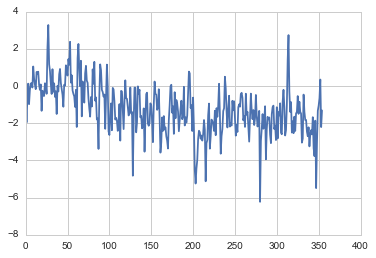

In [139]:
plt.plot(list(events_df.AvgTone))
#plt.yscale('log')

In [141]:
pd.concat([events_df[events_df['AvgTone'] >= 2], events_df[events_df['AvgTone'] <= -5]])

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20161007,2.059901,2.140568,3731,631,3399,493
20161008,3.278853,2.229044,1786,306,1761,272
20161103,2.376222,2.419091,763,133,731,110
20161113,2.260703,2.938403,2256,284,1984,263
20170722,2.736637,2.972340,303,47,291,47
20170402,-5.245687,0.393373,1014,211,987,166
20170414,-5.122555,-0.268421,108,26,108,19
20170618,-6.227075,-0.730088,695,134,661,113
20170824,-5.488201,1.294286,245,45,245,35


In [40]:
events_df.AvgTone.describe()

count    355.000000
mean      -1.234595
std        1.343164
min       -6.227075
25%       -2.133996
50%       -1.314852
75%       -0.316048
max        3.278853
Name: AvgTone, dtype: float64

# Goldstein Scale

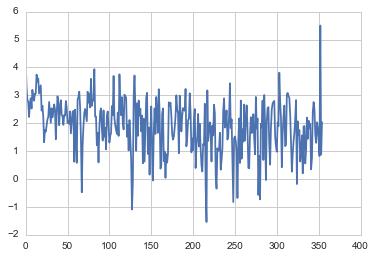

In [41]:
plt.plot(list(events_df.GoldsteinScale))

In [42]:
pd.concat([events_df[events_df['GoldsteinScale'] >= 3.8], events_df[events_df['GoldsteinScale'] <=-1]])

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20160911,-0.547192,4.304310,894,119,808,116
20161202,1.298378,3.935664,797,152,779,143
20170711,-1.586189,3.809804,322,52,308,51
20170829,0.346320,5.500000,28,4,28,4
20170116,-1.395300,-1.089655,173,30,169,29
20170415,-3.073697,-1.540000,129,24,129,15


In [43]:
events_df.GoldsteinScale.describe()

count    355.000000
mean       1.905438
std        0.956548
min       -1.540000
25%        1.347093
50%        2.015766
75%        2.537977
max        5.500000
Name: GoldsteinScale, dtype: float64

# NumMentions

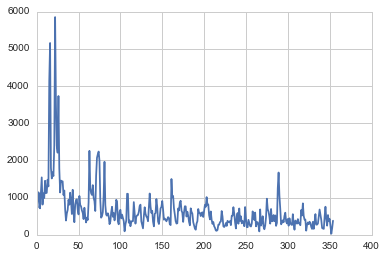

In [44]:
plt.plot(list(events_df.NumMentions))

In [45]:
events_df[events_df['NumMentions'] >= 2000]

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20160926,0.768593,3.603692,4130,728,3905,650
20160927,0.055893,3.062816,5156,858,4760,632
20161002,-0.517625,2.225249,2392,336,2260,301
20161003,-0.536448,1.315686,5852,834,5533,765
20161004,0.148161,1.759144,3523,550,3259,514
20161005,0.057687,1.697832,2390,400,2225,369
20161006,-0.421545,1.908672,2207,416,2056,369
20161007,2.059901,2.140568,3731,631,3399,493
20161113,2.260703,2.938403,2256,284,1984,263


# NumSources

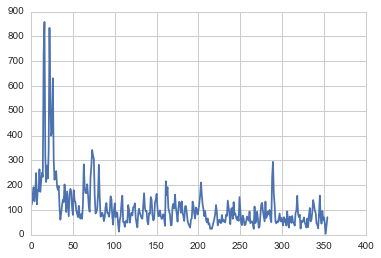

In [46]:
plt.plot(list(events_df.NumSources))

In [47]:
events_df[events_df['NumSources'] >= 300]

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20160926,0.768593,3.603692,4130,728,3905,650
20160927,0.055893,3.062816,5156,858,4760,632
20160928,-0.210844,3.220205,1797,315,1734,292
20161002,-0.517625,2.225249,2392,336,2260,301
20161003,-0.536448,1.315686,5852,834,5533,765
20161004,0.148161,1.759144,3523,550,3259,514
20161005,0.057687,1.697832,2390,400,2225,369
20161006,-0.421545,1.908672,2207,416,2056,369
20161007,2.059901,2.140568,3731,631,3399,493


# NumArticles

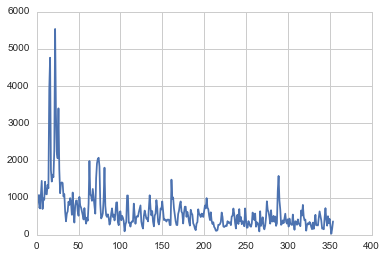

In [48]:
plt.plot(list(events_df.NumArticles))

In [49]:
events_df[events_df['NumArticles'] >= 2000]

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20160926,0.768593,3.603692,4130,728,3905,650
20160927,0.055893,3.062816,5156,858,4760,632
20161002,-0.517625,2.225249,2392,336,2260,301
20161003,-0.536448,1.315686,5852,834,5533,765
20161004,0.148161,1.759144,3523,550,3259,514
20161005,0.057687,1.697832,2390,400,2225,369
20161006,-0.421545,1.908672,2207,416,2056,369
20161007,2.059901,2.140568,3731,631,3399,493
20161123,0.293193,2.071103,2165,342,2038,263


# Events

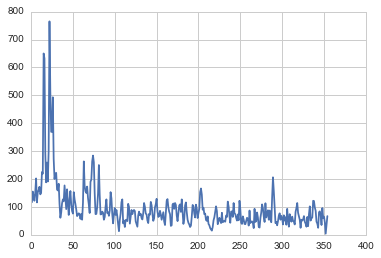

In [50]:
plt.plot(list(events_df.Events))

In [54]:
events_df[events_df['Events'] >= 275]

,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
SQLDATE,,,,,,
20160926,0.768593,3.603692,4130,728,3905,650
20160927,0.055893,3.062816,5156,858,4760,632
20160928,-0.210844,3.220205,1797,315,1734,292
20161002,-0.517625,2.225249,2392,336,2260,301
20161003,-0.536448,1.315686,5852,834,5533,765
20161004,0.148161,1.759144,3523,550,3259,514
20161005,0.057687,1.697832,2390,400,2225,369
20161006,-0.421545,1.908672,2207,416,2056,369
20161007,2.059901,2.140568,3731,631,3399,493


In [58]:
twitter_df['Dates'] = [int(date) for date in list(twitter_df.index)]

# Full Dataset

In [59]:
data = pd.concat([twitter_df, events_df], axis=1).fillna(method='ffill')

In [60]:
data.head(20)

,ArrTime,TweetLen,RT,Fav,PosWords,NegWords,Tweets,Dates,AvgTone,GoldsteinScale,NumMentions,NumSources,NumArticles,Events
20160911,1.048383,24.457235,287660.0,164738.0,258.0,45.0,4361.0,20160911.0,-0.547192,4.304310,894.0,119.0,808.0,116.0
20160912,1.930897,24.494482,4532694.0,3086731.0,2942.0,739.0,36062.0,20160912.0,-1.960844,3.279487,726.0,124.0,724.0,117.0
20160913,1.619007,25.076207,4915644.0,3052886.0,4295.0,1334.0,48867.0,20160913.0,-0.668595,2.845806,1143.0,163.0,1059.0,155.0
20160914,0.845102,25.037506,2883815.0,2056129.0,2612.0,525.0,31808.0,20160914.0,0.126425,2.770803,1098.0,192.0,1066.0,137.0
20160915,1.741547,24.959742,1670461.0,1061135.0,1612.0,448.0,20170.0,20160915.0,-0.974327,2.219672,711.0,135.0,707.0,122.0
20160916,1.074823,24.219481,2159568.0,1390254.0,2409.0,687.0,40295.0,20160916.0,-0.215027,2.700000,1116.0,168.0,1099.0,153.0
20160917,1.977888,23.876874,2534144.0,1698023.0,3128.0,1094.0,46627.0,20160917.0,0.133101,2.895050,1543.0,249.0,1449.0,202.0
20160918,2.240310,24.307525,2232602.0,1534565.0,2876.0,604.0,41821.0,20160918.0,0.154699,2.526724,812.0,123.0,694.0,116.0
20160919,2.600000,24.358969,3513855.0,2132814.0,3880.0,807.0,53740.0,20160919.0,-0.081255,3.193421,1115.0,180.0,976.0,152.0
20160920,2.306170,24.400921,3545878.0,1911385.0,2556.0,469.0,43208.0,20160920.0,1.049852,2.916875,987.0,178.0,941.0,160.0


In [61]:
data.to_csv('final_data_2.csv', index=False)

In [88]:
x_columns = ['ArrTime', 'TweetLen', 'PosWords', 'NegWords', 'AvgTone', 'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'Events']
y_columns = ['Tweets', 'RT', 'Fav']

In [89]:
data_X = data[x_columns]
data_Y = data[y_columns]

In [214]:
# Split the data into training/testing sets
split = 300
data_X_train = data_X[:-split]
data_X_test = data_X[-split:]

# Split the targets into training/testing sets
data_y_train = data_Y[:-split]
data_y_test = data_Y[-split:]

In [215]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 10))

y_train_tweets = scaler.fit_transform(list(data_y_train.Tweets))
y_train_rt = scaler.fit_transform(list(data_y_train.RT))
y_train_fav = scaler.fit_transform(list(data_y_train.Fav))
y_train = np.array([(y_train_tweets[i]*y_train_rt[i]*y_train_fav[i])**(1./3.) for i in range(len(y_train_tweets))])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

In [216]:
scaler = MinMaxScaler(copy=True, feature_range=(min(y_train), max(y_train)))

y_test_tweets = scaler.fit_transform(list(data_y_test.Tweets))
y_test_rt = scaler.fit_transform(list(data_y_test.RT))
y_test_fav = scaler.fit_transform(list(data_y_test.Fav))
y_test = np.array([(y_test_tweets[i]*y_test_rt[i]*y_test_fav[i])**(1./3.) for i in range(len(y_test_tweets))])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

In [217]:
print(min(y_train), max(y_train))
print(min(y_test), max(y_test))

0.0 5.97820074623
0.0 5.66085131645


In [218]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_X_train, y_train)

# Make predictions using the testing set
data_y_pred = regr.predict(data_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.10f"
      % mean_squared_error(y_test, data_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %10f' % r2_score(y_test, data_y_pred))

Coefficients: 
 [  8.96010221e-02  -1.23334794e-01  -3.45892851e-05   3.38849330e-04
  -1.80864015e-01  -3.12942014e-02   5.10484321e-04  -2.24282267e-03
  -1.20223879e-03   5.74460759e-03]
Mean squared error: 0.4925363192
Variance score:  -0.014092


In [219]:
X = data_X_train
y = y_train

#X2 = sm.add_constant(X)
#est = sm.api.OLS(y,X).fit()
#print(est.summary())
est = reg.linear_model.OLS(y,X).fit()
print(est.summary())

pred_y= est.predict(data_X_test)
print (pred_y.shape)
pred_y = pred_y
#print(sm.regression.linear_model.OLSResults.mse_total(data_y_test, pred_y))
#print(smt.rmse(data_y_test, pred_y))
#print(sm.regression.linear_model.OLSResults.rsquared(data_y_test, pred_y))

# # The mean squared error
print("Mean squared error: %.10f"
       % mean_squared_error(y_test, pred_y))
# # Explained variance score: 1 is perfect prediction
print('Variance score: %.10f' % r2_score(y_test, pred_y))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     3.605
Date:                Tue, 12 Sep 2017   Prob (F-statistic):            0.00135
Time:                        11:32:39   Log-Likelihood:                -68.320
No. Observations:                  56   AIC:                             156.6
Df Residuals:                      46   BIC:                             176.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
ArrTime            0.1055      0.182      0.

In [220]:
print(data_X_test.shape, y_test.shape)
print(data_X_train.shape, y_train.shape)

(300, 10) (300,)
(56, 10) (56,)


In [221]:
pred_y.shape

(300,)

In [222]:
def sstot(y):
    mean_y = sum(y)/len(y)
    val = 0
    for i in range(len(y)):
        val+=(y[i]-mean_y)*(y[i]-mean_y)
    return val

def ssres(y1,y2):
    val = 0
    for i in range(len(y1)):
        val+=(y1[i]-y2[i])*(y1[i]-y2[i])
    return val

print(sstot(list(y_test)))
r2 = 1 - ((ssres(list(y_test),list(pred_y)))/sstot(list(y_test)))
print(r2)
print(ssres(list(y_test),list(pred_y))/50)

145.707644386
0.0306666149118
2.82478568333


In [223]:
sstot(list(y_train))

53.005475142024451